In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill"].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df


df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me


## total spend

In [14]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()


a = total_spent(df)
a

np.float64(0.0)

# top spends

In [15]:
df[["Date", "Amount", "Item", "Category"]].sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category


## categorical

In [16]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d


d = categorical(df)
d

,Amount
Category,


## plot

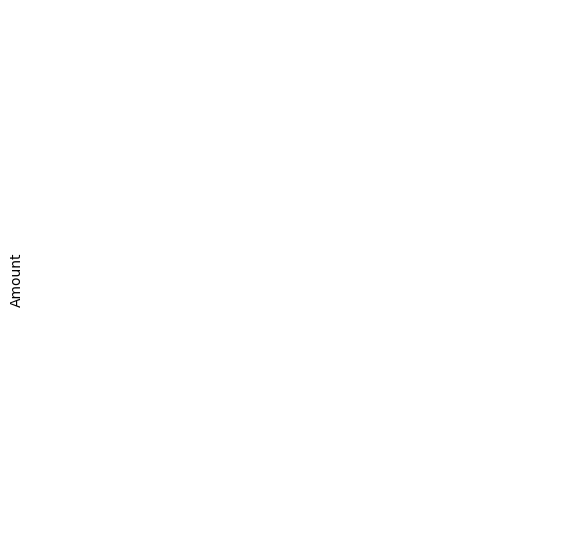

In [17]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))


plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [18]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,


## plot


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 900x900 with 0 Axes>

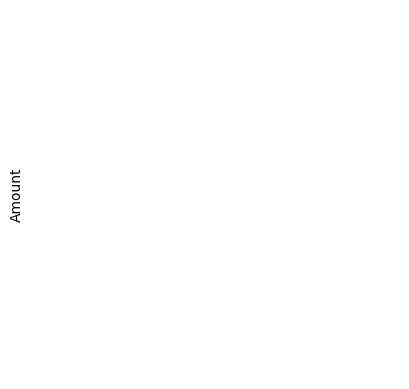

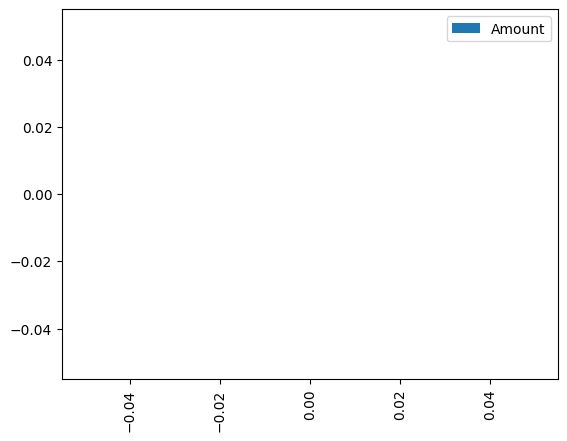

In [19]:
plt.figure(figsize=(9, 9))
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")

## owed

In [ ]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

0.0


## No of refills ago

In [ ]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1 : refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)


e = no_of_refills_ago(1)
e

,Amount
Category,
all,15520.0
food,310.0
me,190.0
travel,335.0
utility,3667.0


## common items

In [ ]:
import pandas as pd


def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)


most_common_item()

Item
milk            38
petrol          32
vegetables      28
chocolate       26
honey-chilli    11
                ..
coughsil         1
rave             1
movie            1
sizzler          1
backlog          1
Name: count, Length: 146, dtype: int64


# All time - starting sep 2022

In [ ]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()

np.float64(149586.66666666666)

# Month Wise

In [ ]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
4      6557.500000
5      9096.000000
6      6799.500000
7      7773.000000
8      9305.166667
9      8535.500000
11    15520.000000
Name: Amount, dtype: float64